In [1]:
from src.utils import (
    load_complex_array_from_binary,
    elastic_load_signal_trends_path,
    dynamic_load_signal_trends_path,
)

elastic_load_signal_trends = load_complex_array_from_binary(
    name="0", path=elastic_load_signal_trends_path
).real

C_1_0, C_1_1, S_1_1 = (
    elastic_load_signal_trends[0, 1, 0],
    elastic_load_signal_trends[0, 1, 1],
    elastic_load_signal_trends[1, 1, 1],
)

computed_elastic_load_signal_trends = load_complex_array_from_binary(
    name="4", path=dynamic_load_signal_trends_path
).real

computed_C_1_0, computed_C_1_1, computed_S_1_1 = (
    computed_elastic_load_signal_trends[0, 1, 0],
    computed_elastic_load_signal_trends[0, 1, 1],
    computed_elastic_load_signal_trends[1, 1, 1],
)

In [2]:
C_1_0, C_1_1, S_1_1

(-1.3731231054595958, -0.2900995977000854, -0.009029381305166695)

In [3]:
computed_C_1_0, computed_C_1_1, computed_S_1_1

(-1.964215480829817, -0.47021292363502243, 0.09529121869510364)

In [4]:
from numpy import nan_to_num

SE = nan_to_num(
    x=(computed_elastic_load_signal_trends - elastic_load_signal_trends)
    / abs(computed_elastic_load_signal_trends + elastic_load_signal_trends),
    nan=0.0,
)

/tmp/ipykernel_24820/1026975441.py:4: RuntimeWarning: invalid value encountered in divide
  x=(computed_elastic_load_signal_trends - elastic_load_signal_trends)


In [5]:
from src.utils import build_frequencial_harmonic_elastic_load_signal
from src.utils.classes import load_load_signal_hyper_parameters

(
    dates,
    frequencies,
    frequencial_harmonic_elastic_load_signal,
    harmonic_elastic_load_signal_trends,
) = build_frequencial_harmonic_elastic_load_signal(
    load_signal_hyper_parameters=load_load_signal_hyper_parameters()
)

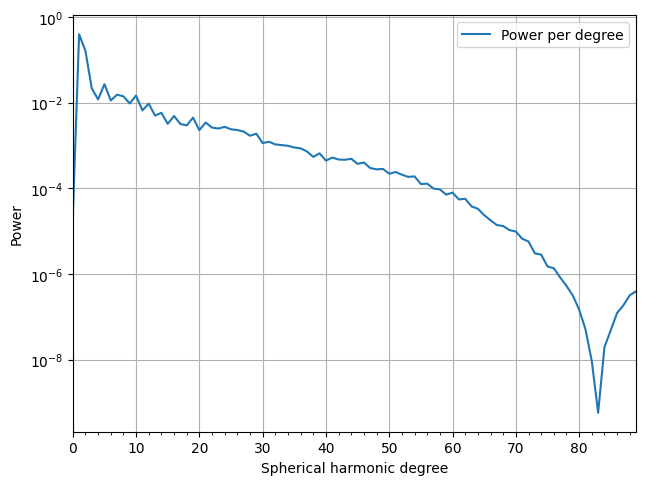

In [17]:
from pyshtools import SHCoeffs

clm = SHCoeffs.from_array(coeffs=computed_elastic_load_signal_trends - elastic_load_signal_trends)
fig, ax = clm.plot_spectrum(show=False)

1.2093482257826342

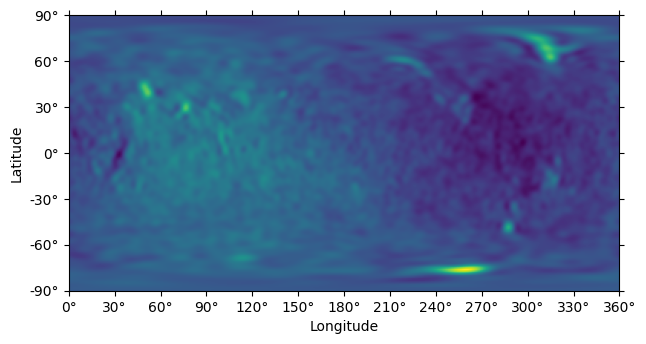

In [12]:

grid = clm.expand()
fig, ax = grid.plot(show=False)

max(abs(SE).flatten())